<a href="https://colab.research.google.com/github/muiruridan/Monty_Hall_Problem/blob/main/Monty_Hall_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" The Monty Hall Problem.

The Monty Hall problem is a famous probability puzzle named after the host of the American television game show "Let's Make a Deal," Monty Hall.
The problem is a classic illustration of counterintuitive probabilistic reasoning. It can be stated as follows:
  You are a contestant on a game show. In front of you, there are three doors: Door 1, Door 2, and Door 3.
  Behind one of the doors, there is a valuable prize, while the other two doors hide nothing.
  You start by selecting one of the three doors. After you make your choice, but before the door is opened,
  the host (Monty Hall) opens one of the remaining two doors that you did not select, revealing an empty space behind it.
  The host knows where the prize is located.

Now, you are faced with a decision: Do you stick with your original choice, or do you switch and choose the other unopened door?
The Monty Hall problem raises the question of whether it's more advantageous to stick with your initial choice or to switch doors
to maximize your chances of winning the prize.

The Counterintuitive Solution:
The optimal strategy is to always switch doors. This may seem counterintuitive, but it can be understood through probability analysis.
Initially, when you choose a door, there's a 1/3 chance that the prize is behind your chosen door and a 2/3 chance
that it's behind one of the other two doors combined.
When the host opens a door to reveal an empty space, he essentially provides you with additional information.
If you switch doors, you effectively switch your probability of winning from 1/3 to 2/3. This can be explained as follows:
  If you initially chose the door with the prize (1/3 chance), switching doors will result in a loss.
  If you initially chose a door without the prize (2/3 chance), switching doors will guarantee a win, as the host must reveal the empty door.

In other words, by switching doors, you are capitalizing on the higher probability (2/3) that you initially chose a door without the prize.

"""


' The Monty Hall Problem.\n\nThe Monty Hall problem is a famous probability puzzle named after the host of the American television game show "Let\'s Make a Deal," Monty Hall.\nThe problem is a classic illustration of counterintuitive probabilistic reasoning. It can be stated as follows:\n  You are a contestant on a game show. In front of you, there are three doors: Door 1, Door 2, and Door 3.\n  Behind one of the doors, there is a valuable prize, while the other two doors hide nothing.\n  You start by selecting one of the three doors. After you make your choice, but before the door is opened,\n  the host (Monty Hall) opens one of the remaining two doors that you did not select, revealing an empty space behind it.\n  The host knows where the prize is located.\n\nNow, you are faced with a decision: Do you stick with your original choice, or do you switch and choose the other unopened door?\nThe Monty Hall problem raises the question of whether it\'s more advantageous to stick with your i

In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


In [ ]:
# Define the Bayesian Network
# MontyChoice variable depends on both the GuestChoice and Prize variables
model = BayesianNetwork([('GuestChoice', 'MontyChoice'), ('Prize', 'MontyChoice')])

# Define conditional probability distributions (CPDs)
cpd_guest_choice = TabularCPD(variable='GuestChoice', variable_card=3, values=[[1/3], [1/3], [1/3]])
cpd_prize = TabularCPD(variable='Prize', variable_card=3, values=[[1/3], [1/3], [1/3]])
cpd_monty_choice = TabularCPD(variable='MontyChoice', variable_card=3,

                              # The values parameter represents the conditional probabilities of 'MontyChoice' given the values of 'GuestChoice' and 'Prize'.
                              # The evidence parameter specifies the parent variables ('GuestChoice' and 'Prize') that influence 'MontyChoice',
                              # and evidence_card specifies the possible values for those parent variables.
                              values=[[0, 0, 0, 0, 0, 1, 0, 1, 0],
                                      [0.5, 0, 1, 0, 0.5, 0, 0, 0, 0.5],
                                      [0.5, 1, 0, 1, 0.5, 0, 1, 0, 0.5]],

                              #The evidence parameter specifies the parent variables('GuestChoice' and 'Prize') that influence
                              #'MontyChoice', and evidence_card specifies the possible values for those parent variables.

                              evidence=['GuestChoice', 'Prize'], evidence_card=[3, 3])

# Add CPDs to the model
model.add_cpds(cpd_guest_choice, cpd_prize, cpd_monty_choice)

# Check model for validity of CPDs
if model.check_model():
    print("Model is valid.")

# Perform variable elimination
inference = VariableElimination(model)

# Query: P(Prize | GuestChoice=1, MontyChoice=2)
result = inference.query(variables=['Prize'], evidence={'GuestChoice': 0, 'MontyChoice': 2})
print(result)

# Query: P(Prize GuestChoice=0, MontyChoice=1)
# Query: P(Prize GuestChoice=2, MontyChoice=0)



Model is valid.
+----------+--------------+
| Prize    |   phi(Prize) |
+==========+==============+
| Prize(0) |       0.3333 |
+----------+--------------+
| Prize(1) |       0.6667 |
+----------+--------------+
| Prize(2) |       0.0000 |
+----------+--------------+


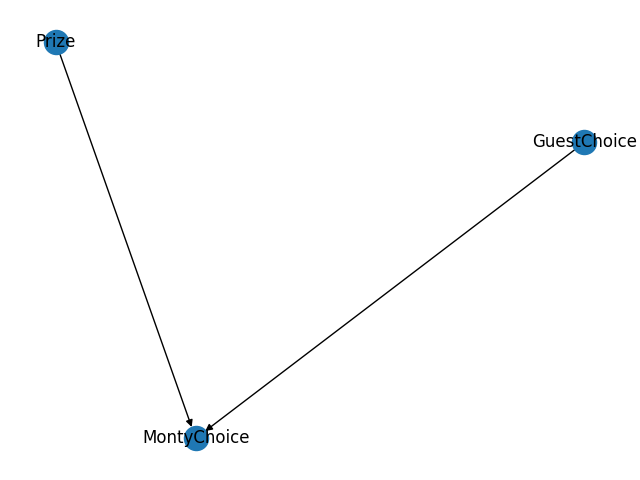

In [ ]:
# importing the libraries
import networkx as nx
import pylab as plt


# Plotting the Bayesian Network.
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())

nx.draw(nx_graph, with_labels=True)
image_path = 'model.png'
plt.savefig(image_path)
plt.close()

from IPython.display import Image, display
display(Image(filename=image_path))
